In [1]:
from collections import Counter
from konlpy.tag import Twitter
from wordcloud import WordCloud
import pandas as pd
import re
import nltk

jvmPath='D:/myUtil/devTools/Java/JRE/bin/server/jvm.dll'

In [2]:
dis_txt_data = pd.read_json('./data/(o)inst_dis_text.json', encoding='utf-8')
tw_dis_txt = pd.read_json('./data/(o)tw_dis_text.json', encoding='utf-8')
dis_txt_data=dis_txt_data.append(tw_dis_txt)
dis_txt_data.head(5)

,hash_tag,post
0,#20180511 퓨마 바스켓하트랑 1년도 못가고... 안녕... 휠라 디스럽터2 ...,#20180511 퓨마 바스켓하트랑 1년도 못가고... 안녕... 휠라 디스럽터2 ...
1,.,Passion.
10,#fila #휠라 #디스럽터2 #shoes #crack #insta #instagr...,평소 사이즈 245에 아디다스 240신는데 얘는 240시켰다가 너무 딱맞고 발이 아...
100,#커플운동화 #Fila #디스럽터2 #너무예쁨 #우리 #🙈💕,.\n❤️🧡💛💚💙💜\n#커플운동화 #Fila\n#디스럽터2 #너무예쁨 #우리\n#🙈💕
1000,,#이뻐요


In [3]:
dis_txt = dis_txt_data['post']
dis_txt_modify = str(dis_txt)
len(dis_txt_modify)

3577

In [11]:
dis_txt_modify=re.sub('[^가-힝0-9a-zA-Z\\s]', '', dis_txt_modify)
dis_txt_modify

'0       20180511 퓨마 바스켓하트랑 1년도 못가고 안녕 휠라 디스럽터2 \n1                                                Passion\n10      평소 사이즈 245에 아디다스 240신는데 얘는 240시켰다가 너무 딱맞고 발이 아\n100       nn커플운동화 Filan디스럽터2 너무예쁨 우리n\n1000                                                 이뻐요\n1001                네번째커플신발휠라디스럽터2n럽스타그램존예ootd\n1002                             자주 소통해요 오늘 하루도 즐겁게 보내세요\n1003     사진이 멋져요 멋진 신발을 찾고 계시다면 제 계정도 구경해 보세요 맞팔 환영합니다\n1004    96 23 데일리 운동화 휠라 디스럽터2 블랙 소통 instadai\n1005                                                멋지네요\n1006                                                미친개이뻐\n1007                            애아픈거보다는 우리가아픈게나아내일봥\n1008                        yiooij 이거 진짜 어느옷이든 다어울려 개좋아\n1009                                                 털보\n101     휠라키즈n귀여운 사이즈를 신었습니당n4살 남아 170 사이즈 디스럽터\n1010                                             헐신발디따이뿌당\n1011                                                  아으\n1012                                    yeobdoong  너두 잖앙\n1013                   

In [12]:
dis_txt_modify = dis_txt_modify.replace('Name post Length 1377 dtype object',' ')
dis_txt_modify = dis_txt_modify.replace('\n',' ')
dis_txt_modify = dis_txt_modify.replace('디스럽터 2','디스럽터2')

In [14]:
token_dis_txt = nltk.word_tokenize(dis_txt_modify)
token_dis_txt[:10]

['0', '20180511', '퓨마', '바스켓하트랑', '1년도', '못가고', '안녕', '휠라', '디스럽터2', '1']

In [18]:
#불필요한 용어 삭제하기
stopwords = ['0','1','o','넹','n','httpstcoqkWd2bzGeN','이','10']
token_dis_txt =[str_word for str_word in token_dis_txt if str_word not in stopwords]
len(token_dis_txt)

345

In [20]:
tk_dis_txt = nltk.Text(token_dis_txt, name='disText')
print(len(tk_dis_txt.tokens))
print(len(set(tk_dis_txt.tokens)))
# tk_dis_txt.vocab().items()
tk_dis_txt.vocab().most_common(10)# top 10개 보기

345
274


[('디스럽터2', 15),
 ('휠라', 8),
 ('RT', 4),
 ('살까', 4),
 ('자주', 3),
 ('소통해요', 3),
 ('오늘', 3),
 ('하루도', 3),
 ('즐겁게', 3),
 ('보내세요', 3)]

In [21]:
# 그래프를 그리기위한 설정
%matplotlib inline
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/HYBDAL.TTF'#H2PORM.TTF'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [22]:
# word cloud 그리기 준비
diswordData = tk_dis_txt.vocab().most_common(400)# 형태소 빈도수 최대 500개
tx_disdata = dict(diswordData)
wc_dis = WordCloud(font_path=font_path,
              relative_scaling=0.2,
              background_color='white',
              ).generate_from_frequencies(tx_disdata)

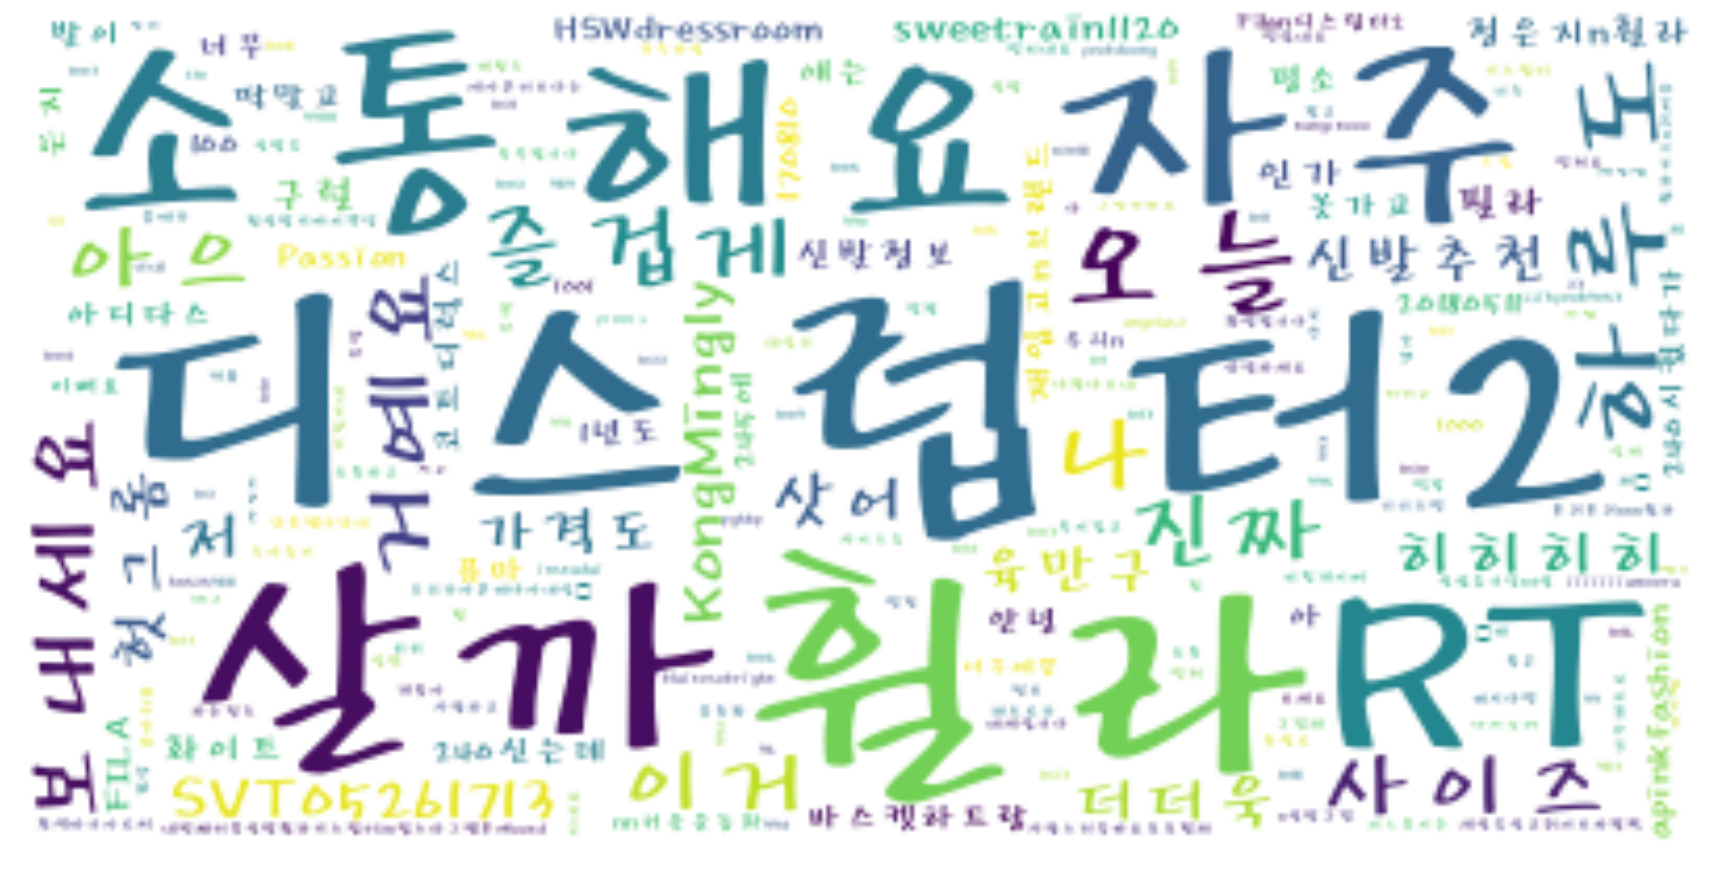

In [23]:
plt.figure(figsize=(30,20))
plt.imshow(wc_dis, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
## 이미지에 적용해 보자
import numpy as np
from PIL import Image

fila_logo = np.array(Image.open('./data/img/fila2.jpg'))

from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
imageColors = ImageColorGenerator(fila_logo)
stop_word = set(STOPWORDS)

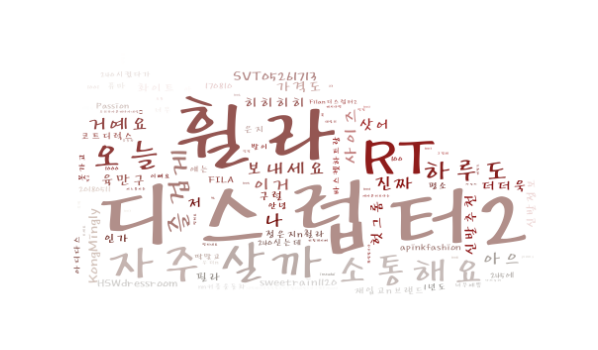

In [38]:
diswordData_logo = tk_dis_txt.vocab().most_common(400)# 형태소 빈도수 최대 500개
dis_tx_data_logo = dict(diswordData_logo)

logo_wc = WordCloud(font_path=font_path, max_words=100,
                   relative_scaling=0.2,
                   mask=fila_logo, stopwords=stop_word,
                   background_color='white',
                   min_font_size=1, random_state=42,
                    max_font_size=100
                   ).generate_from_frequencies(dis_tx_data_logo)

plt.figure(figsize=(10,10))
# plt.imshow(logo_wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.imshow(logo_wc.recolor(color_func=imageColors), interpolation='bilinear')
plt.axis("off")
plt.show()